## basic classifier for Dna2Vec represenation

Basic bacterial genome classification using Dna2Vec representation

In [1]:
%load_ext autoreload
%autoreload 2

In [174]:
#export
import sys
sys.path.append("..")
from faigen.data import sequence 
from faigen.data.sequence import regex_filter, count_filter, Dna2VecDataBunch
from functools import partial
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import manifold,neighbors
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import plotly.plotly as py
import plotly.graph_objs as go
from fastai import *
from fastai.data_block import *
from fastai.basic_train import *
from fastai.layers import *
from fastai.metrics import *
from gensim.models import Word2Vec
import torch 
import torch.nn as nn
import torch.nn.functional as F

### Load Data

In [ ]:
#export
if __name__=='__main__':

In [64]:
#export
print("Loading embedding")
word_vectors = Word2Vec.load_word2vec_format('../faigen/pretrained/embeddings/dna2vec-20190611-1940-k8to8-100d-10c-4870Mbp-sliding-LmP.w2v') 

In [207]:
#export
print("Loading Data")
DB="/data/genomes/GenSeq_fastas"
# DB='/home/serge/development/genomes/ncbi-genomes-2019-04-07/bacterial genomes'

filters=[partial(regex_filter, rx="Bacillus|Staphylococcus|Vibrio|Rhizobium"),partial(regex_filter, rx="plasmid?\s", keep=False)]    
#        partial(count_filter,num_fastas=(1,1), keep=1)]

bunch = Dna2VecDataBunch.from_folder(DB,test="test",
             filters=filters,
             labeler=lambda x: x.split()[1],
             emb=word_vectors,ngram=8,skip=0,
             n_cpus=7,agg=partial(np.mean, axis=0))

print("Creating Learner")
layers=[nn.Linear(bunch.train_dl.x.c,10),nn.ReLU(),
        nn.Linear(10,bunch.train_dl.y.c)]
bac_classifier = SequentialEx(*layers)
print(bac_classifier)
learn = Learner(bunch, bac_classifier, metrics=[accuracy])

print ("Training")
learn.fit_one_cycle(3,5e-2)

Loading Data
Creating Learner
SequentialEx(
  (layers): ModuleList(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=4, bias=True)
  )
)
Training


epoch,train_loss,valid_loss,accuracy,time
0,1.143348,4.225197,0.174679,00:01
1,0.997950,3.110410,0.277244,00:01
2,0.932375,3.156275,0.280449,00:01


In [208]:
bunch.valid_ds.y[3]

Category 1

In [209]:
bunch

Dna2VecDataBunch;

Train: LabelList (1915 items)
x: Dna2VecList
[-0.134055 -0.349299 -0.044119  0.068639 ... -0.197828 -0.005512  0.006151 -0.328752],[-0.150918 -0.353403 -0.022866  0.06943  ... -0.197418 -0.00887  -0.01249  -0.324543],[-0.078643 -0.322992 -0.058123  0.041391 ... -0.209444  0.038987 -0.011716 -0.264936],[ 0.016499 -0.299516 -0.075189  0.046569 ... -0.203351 -0.135401  0.028634 -0.259057],[-0.009767 -0.192923 -0.102343  0.078391 ... -0.251641  0.015452  0.024233 -0.29255 ]
y: CategoryList
0,2,2,2,2
Path: /data/genomes/GenSeq_fastas/train;

Valid: LabelList (624 items)
x: Dna2VecList
[-0.134055 -0.349299 -0.044119  0.068639 ... -0.197828 -0.005512  0.006151 -0.328752],[-0.150918 -0.353403 -0.022866  0.06943  ... -0.197418 -0.00887  -0.01249  -0.324543],[-0.167104 -0.27828  -0.016269  0.137708 ... -0.189737  0.02924  -0.064984 -0.335644],[-0.113175 -0.373836  0.001756  0.037688 ... -0.243525 -0.009868 -0.010606 -0.306397],[-0.111694 -0.353767  0.0023    0.053882 ... -0.20

In [182]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'other'

In [210]:
learn.predict(10)[0]

Category 2

In [176]:
i

tensor(2)

In [184]:
!python notebook2script.py BacteriaClassifier.ipynb

../exp/nb_BacteriaClassifier.py
Converted BacteriaClassifier.ipynb to ../exp/nb_BacteriaClassifier.py


In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


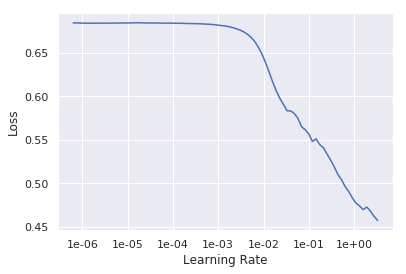

In [24]:
learn.recorder.plot()

In [ ]:
%debug

> /home/serge/anaconda3/envs/bio-2/lib/python3.6/site-packages/torch/utils/data/dataloader.py(608)_process_next_batch()
    606                 raise Exception("KeyError:" + batch.exc_msg)
    607             else:
--> 608                 raise batch.exc_type(batch.exc_msg)
    609         return batch
    610 

ipdb> batch


In [10]:
len(data.items)

1686

###  Genome vectors

## Genome Inventory

In [92]:
all_fastas = sequence.Dna2VecList.from_folder(DB).items

In [97]:
inventory = pd.DataFrame(data=all_fastas)

In [98]:
inventory

,description,file,id,len,name
0,"NZ_FQXZ01000077.1 Vibrio aerogenes CECT 7868, ...",/data/genomes/GenSeq_fastas/valid/GCF_90013010...,NZ_FQXZ01000077.1,3323,NZ_FQXZ01000077.1
1,"NZ_FQXZ01000076.1 Vibrio aerogenes CECT 7868, ...",/data/genomes/GenSeq_fastas/valid/GCF_90013010...,NZ_FQXZ01000076.1,752,NZ_FQXZ01000076.1
2,"NZ_FQXZ01000073.1 Vibrio aerogenes CECT 7868, ...",/data/genomes/GenSeq_fastas/valid/GCF_90013010...,NZ_FQXZ01000073.1,735,NZ_FQXZ01000073.1
3,"NZ_FQXZ01000071.1 Vibrio aerogenes CECT 7868, ...",/data/genomes/GenSeq_fastas/valid/GCF_90013010...,NZ_FQXZ01000071.1,2512,NZ_FQXZ01000071.1
4,"NZ_FQXZ01000070.1 Vibrio aerogenes CECT 7868, ...",/data/genomes/GenSeq_fastas/valid/GCF_90013010...,NZ_FQXZ01000070.1,1089,NZ_FQXZ01000070.1
5,"NZ_FQXZ01000068.1 Vibrio aerogenes CECT 7868, ...",/data/genomes/GenSeq_fastas/valid/GCF_90013010...,NZ_FQXZ01000068.1,1662,NZ_FQXZ01000068.1
6,"NZ_FQXZ01000067.1 Vibrio aerogenes CECT 7868, ...",/data/genomes/GenSeq_fastas/valid/GCF_90013010...,NZ_FQXZ01000067.1,4452,NZ_FQXZ01000067.1
7,"NZ_FQXZ01000066.1 Vibrio aerogenes CECT 7868, ...",/data/genomes/GenSeq_fastas/valid/GCF_90013010...,NZ_FQXZ01000066.1,6487,NZ_FQXZ01000066.1
8,"NZ_FQXZ01000062.1 Vibrio aerogenes CECT 7868, ...",/data/genomes/GenSeq_fastas/valid/GCF_90013010...,NZ_FQXZ01000062.1,9215,NZ_FQXZ01000062.1
9,"NZ_FQXZ01000061.1 Vibrio aerogenes CECT 7868, ...",/data/genomes/GenSeq_fastas/valid/GCF_90013010...,NZ_FQXZ01000061.1,1952,NZ_FQXZ01000061.1


In [99]:
inventory.groupby("genus").agg({"species":"count"}).sort_values("species",ascending=False)

KeyError: 'genus'

In [6]:
all_fasts

NameError: name 'all_fasts' is not defined

In [24]:
inventory.groupby(["genus", "species"]).agg({"species": "count"})
inventory.columns=["count"]
inventory

count
genus            species                
'Catharanthus    roseus'               2
'Deinococcus     soli'                 1
'Nostoc          azollae'              3
18,711,729       reads                 1
Acaryochloris    marina               10
Acetobacter      aceti                 1
                 ascendens             1
                 orientalis            2
                 oryzifermentans       1
                 pasteurianus         91
                 persici               2
                 pomorum               7
                 senegalensis          2
                 sp.                   7
                 tropicalis            2
Acetobacterium   woodii                1
Acetohalobium    arabaticum            1
Acetomicrobium   mobile                1
Acholeplasma     axanthum              1
                 hippikon              2
                 laidlawii             2
                 oculi                 1
Achromobacter    denitrificans         3
                 insolitus             4
                 sp.                   2
                 spanius               4
                 xylosoxidans         11
Acidaminococcus  fermentans            1
                 intestini             1
Acidiferrobacter sp.                   1
...                                  ...
Zymobacter       palmae                2
Zymomonas        mobilis              49
[Arcobacter]     porcinus              1
[Bacillus        thuringiensis]        2
[Bacillus]       caldolyticus          2
                 selenitireducens      1
[Brevibacterium] flavum                2
                 frigoritolerans       1
[Clostridium]    bolteae               2
                 cellulolyticum        1
                 cellulosi             1
                 clariflavum           1
                 propionicum           1
                 saccharolyticum       1
                 scindens              1
                 stercorarium          4
[Enterobacter]   lignolyticus          1
[Eubacterium]    eligens               3
                 hallii                1
                 rectale               1
[Haemophilus]    ducreyi              14
                 parasuis              4
[Mycobacterium]  chelonae              2
[Pasteurella]    aerogenes             1
[Polyangium]     brachysporum          1
[Pseudomonas     syringae]             3
[Pseudomonas]    mesoacidophila        4
complete         chromosome            2
gamma            proteobacterium       1
secondary        endosymbiont          1

[3186 rows x 1 columns]

In [25]:
all_fastas

['NZ_CP013305.1 Vibrio cholerae strain CRC1106 chromosome 1, complete sequence',
 'NZ_CP013306.1 Vibrio cholerae strain CRC1106 chromosome 2, complete sequence',
 'NC_013791.2 Bacillus pseudofirmus OF4, complete genome',
 'NC_013792.1 Bacillus pseudofirmus OF4 plasmid pBpOF4-01, complete sequence',
 'NC_013793.1 Bacillus pseudofirmus OF4 plasmid pBpOF4-02, complete sequence',
 'NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome',
 'NC_007164.1 Corynebacterium jeikeium K411 complete genome',
 'NC_003080.1 Corynebacterium jeikeium K411 plasmid pKW4, complete sequence',
 'NC_002162.1 Ureaplasma parvum serovar 3 str. ATCC 700970, complete genome',
 'NC_004088.1 Yersinia pestis KIM10+, complete genome',
 'NC_004838.1 Yersinia pestis KIM10+ plasmid pMT-1, complete sequence',
 'NC_002620.2 Chlamydia muridarum Nigg, complete genome',
 'NC_002182.1 Chlamydia muridarum Nigg plasmid pMoPn, complete sequence',
 'NC_002488.3 Xylella fastidiosa 9a5c, complete genome',
 'NC_002489

In [117]:
counts = inventory.reset_index().groupby("genus").agg({"count", sum}).drop(("species"), axis=1)
counts.columns=["n_sequences","species"]
counts.sort_values("n_sequences", ascending=False)

,n_sequences,species
genus,,
Bacillus,1132,11
Streptomyces,743,5
Vibrio,468,5
Rhizobium,325,6
Pseudomonas,304,8
Staphylococcus,301,6
Clostridium,259,5
Streptococcus,222,6
Planktothrix,179,5
